In [98]:
from SupportVectorClassifier import SupportVectorClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import random

Helper functions to draw hyperplanes and margins.

In [11]:
## w1*x1 + w2*x2 + b = 0 (general form)
## x2 = -(w1 / w2)*x1 - b/w2
def plot_hyperplane(w, b):
    slope = -w[0] / w[1]
    
    x1_coord = np.array(plt.gca().get_xlim()) # get the range of x1 values
    x2_coord = slope * x1_coord - (b / w[1])
    plt.plot(x1_coord, x2_coord, '--', color='black')

## w1*x1 + w2*x2 + b = 1 (positive sample) => x2 = 1 / w2 -b / w2 - (w1 / w2)*x1   
## w1*x1 + w2*x2 + b = -1 (negative sample) => x2 = -1 / w2 -b / w2 - (w1 / w2)*x1  
def plot_margin(w, b):
    slope = -w[0] / w[1]
    
    x1_coord = np.array(plt.gca().get_xlim())
    x2_positive_samples = 1/w[1] - (b / w[1]) + slope * x1_coord
    plt.plot(x1_coord, x2_positive_samples, color='blue') 
    
    x2_negative_samples = -1/w[1] - (b / w[1]) + slope * x1_coord
    plt.plot(x1_coord, x2_negative_samples,color='red')

In [2]:
sns.set_style("darkgrid")

<h3> Linearly Seperable Data </h3>

In [171]:
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

<AxesSubplot:>

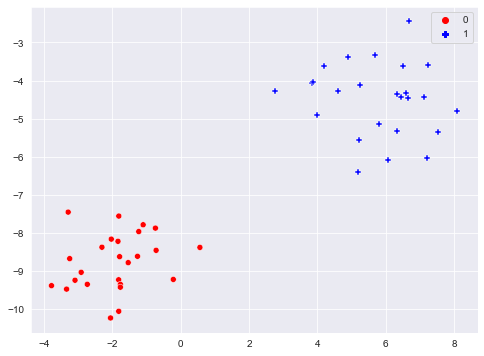

In [172]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

In [173]:
svc = SupportVectorClassifier(C=1,kernel_function=None,epsilon=1e-7)

In [174]:
svc.fit(X,y)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.09716893666878539
            Iterations: 8
            Function evaluations: 408
            Gradient evaluations: 8


C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


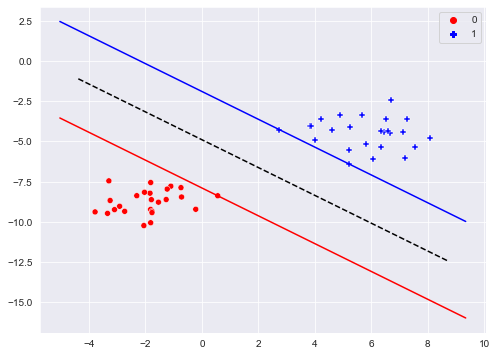

In [175]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)
plot_hyperplane(svc.w,svc.b)
plot_margin(svc.w,svc.b)

<h3> Effect of Parameter C </h3>

Parameter C deterimines how we strictly penalize the misclassifications. Large C means we have hard marigin, small C means we have soft marigin. We can observe the effect of parameter C by adding an outlier into the dataset.

In [176]:
# put an outlier to show the effect of choosing the parameter C
idx = np.argmax(X[:,1])
y[idx] = 0

In [182]:
X[idx,0],X[idx,1]
X[idx,0] + 0.5,X[idx,1] + 0.3,X[idx,0] + 0.1,X[idx,1] + 0.1

(7.188738976515014,
 -2.1484013442637586,
 6.788738976515013,
 -2.3484013442637584)

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(6.388738976515014, -1.6484013442637584, 'Outlier')

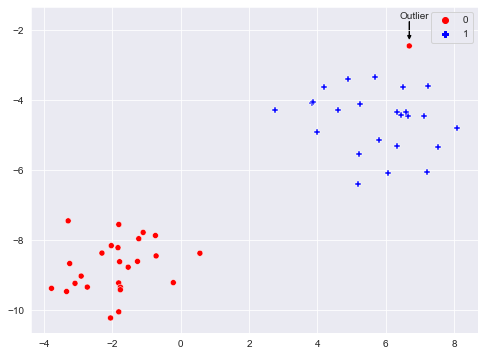

In [206]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

# plot arrow to the outlier
plt.arrow(X[idx,0],X[idx,1] + 0.7,0,-0.5, 
         shape='full', color='black', length_includes_head=True, 
         zorder=0, head_length=0.1, head_width=0.1)

plt.text(X[idx,0]-0.3,X[idx,1] + 0.8,"Outlier")

Optimization terminated successfully    (Exit mode 0)
            Current function value: -373.6214225022005
            Iterations: 41
            Function evaluations: 2093
            Gradient evaluations: 41
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.820249321458577
            Iterations: 9
            Function evaluations: 460
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.029366102775634978
            Iterations: 3
            Function evaluations: 153
            Gradient evaluations: 3


C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

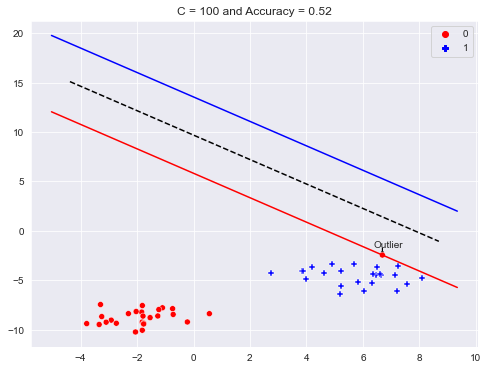

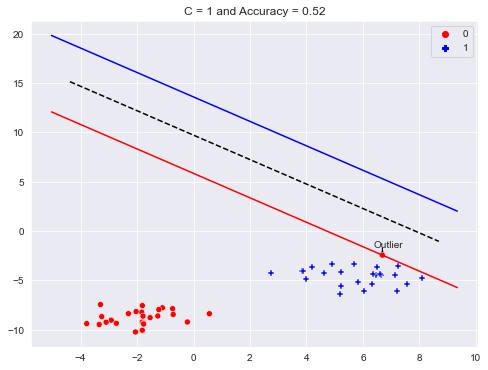

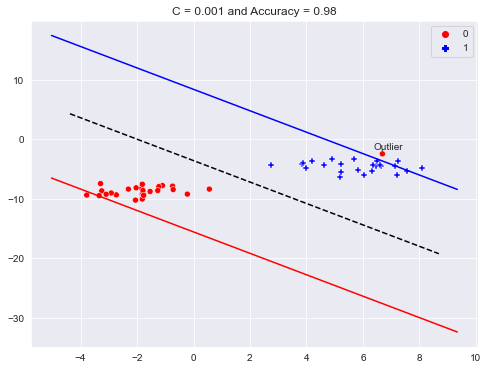

In [207]:
C_values = [100,1,0.001]

for c in C_values:
    svc = SupportVectorClassifier(C=c,kernel_function=None,epsilon=1e-7)
    svc.fit(X,y)
    
    fig, ax = plt.subplots(figsize=(8,6))
    sns.scatterplot(X[:,0], X[:, 1], style=y,hue=y, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)
    # plot arrow to the outlier
    plt.arrow(X[idx,0],X[idx,1] + 0.7,0,-0.5, 
             shape='full', color='black', length_includes_head=True, 
             zorder=0, head_length=0.1, head_width=0.1)

    plt.text(X[idx,0]-0.3,X[idx,1] + 0.8,"Outlier")
    
    plot_hyperplane(svc.w,svc.b)
    plot_margin(svc.w,svc.b)
    
    predictions = np.where(svc.predict(X) <= 0,0,1)
    accuracy = accuracy_score(predictions,y)
    
    plt.title(f"C = {c} and Accuracy = {accuracy}")

<h3> Kernel Functions for Not Linearly Seperable Data </h3>

In [69]:
centers = [[-2,2],[-2,-2],[2,-2],[2,2]]
X_nl, y_nl = datasets.make_blobs(n_samples = 100, n_features=2, centers=centers, cluster_std=0.8, random_state=40)

In [70]:
y_nl = np.where((y_nl == 0) | (y_nl == 2),0,1) # convert it to binary classification

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

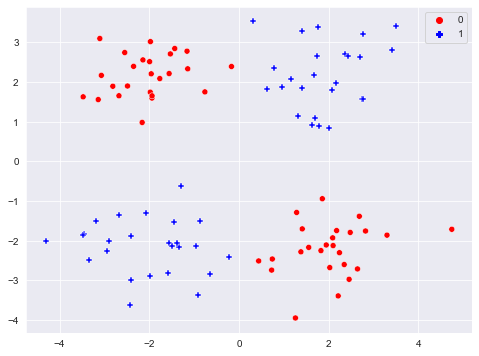

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X_nl[:,0], X_nl[:, 1],style=y_nl,hue=y_nl,markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

Define the gaussian kernel function. Gaussian kernel measures the similarity between the points. Function outputs the value close to 1 for close data points and 0 for the far points. We will observe the effect of gamma parameter on the later step.

In [72]:
def gaussian_kernel(x1, x2, gamma=0.1):
    diff = x1 - x2
    return np.exp(-np.sqrt(diff.dot(diff)) / (2*gamma**2))

In [74]:
kernel_svc = SupportVectorClassifier(kernel_function=gaussian_kernel,gamma=1)

In [75]:
kernel_svc.fit(X_nl,y_nl)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.159559649748119
            Iterations: 13
            Function evaluations: 1316
            Gradient evaluations: 13


How to draw decision boundary </br>
https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

C:\Users\Omer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


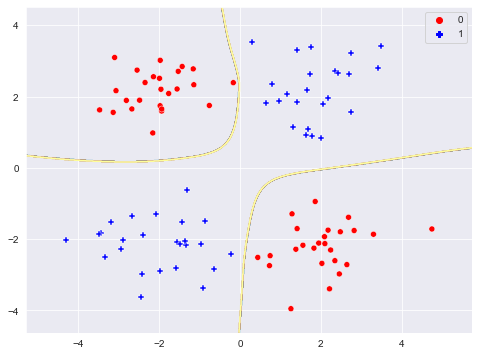

In [208]:
h = 0.01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = xnl_train[:, 0].min() - 1, xnl_train[:, 0].max() + 1
y_min, y_max = xnl_train[:, 1].min() - 1, xnl_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = kernel_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(X_nl[:,0], X_nl[:, 1], style=y_nl,hue=y_nl, markers=['o', 'P'],palette=['red', 'blue'],ax=ax)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

<h3> Performance on the Real World Dataset </h3>

Import the breast cancer dataset.

In [80]:
dataset = datasets.load_breast_cancer()

x = dataset.data
y = dataset.target

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

First try without using kernel function to check if we can seperate the data linearly.

In [82]:
model = SupportVectorClassifier(C=1) # if we use linear svm (without using any kernels)

In [83]:
model.fit(x_train,y_train)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 20313330.48104887
            Iterations: 10
            Function evaluations: 2749
            Gradient evaluations: 6


In [84]:
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

In [85]:
print("Training Accuracy :",accuracy_score(train_preds,y_train))
print("Test Accuracy :",accuracy_score(test_preds,y_test))

Training Accuracy : 0.421978021978022
Test Accuracy : 0.39473684210526316


It is obvious that our model is suffering from underfitting. We can not seperate the dataset linearly, it is too complex to do that.

We can try with using gaussian kernel. Also, we can observe the effect of gamma parameter on the gaussian kernel.

In [107]:
gamma_parameters = [0.1,1,10,100,1000]

gamma_df = pd.DataFrame(columns=['Training Accuracy','Test Accuracy'],index=gamma_parameters)
gamma_df.index.name = 'gamma'

In [108]:
for g in gamma_parameters:
    complex_model = SupportVectorClassifier(C=1,kernel_function=gaussian_kernel,gamma=g)
    
    complex_model.fit(x_train,y_train)

    # make predictions
    train_preds = complex_model.predict(x_train)
    test_preds = complex_model.predict(x_test)
    
    train_acc = accuracy_score(train_preds,y_train)
    test_acc = accuracy_score(test_preds,y_test)
    
    gamma_df.at[g,'Training Accuracy'] = train_acc
    gamma_df.at[g,'Test Accuracy'] = test_acc

    print(f"Gamma = {g}; Training Accuracy :",train_acc)
    print(f"Gamma = {g}; Test Accuracy :",test_acc)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -203.56818181812224
            Iterations: 2
            Function evaluations: 912
            Gradient evaluations: 2
Gamma = 0.1; Training Accuracy : 1.0
Gamma = 0.1; Test Accuracy : 0.6228070175438597
Optimization terminated successfully    (Exit mode 0)
            Current function value: -202.6531600690006
            Iterations: 5
            Function evaluations: 2280
            Gradient evaluations: 5
Gamma = 1; Training Accuracy : 1.0
Gamma = 1; Test Accuracy : 0.6228070175438597
Optimization terminated successfully    (Exit mode 0)
            Current function value: -68.25364876646485
            Iterations: 42
            Function evaluations: 19162
            Gradient evaluations: 42
Gamma = 10; Training Accuracy : 0.9340659340659341
Gamma = 10; Test Accuracy : 0.9649122807017544
Optimization terminated successfully    (Exit mode 0)
            Current function value: -121.28465928

It looks like when gamma decreases svm is suffering from overfitting, when gamma increases svm is suffering from underfitting. In our case best value for the gamma is 10.

In [109]:
gamma_df

,Training Accuracy,Test Accuracy
gamma,,
0.1,1.0,0.622807
1.0,1.0,0.622807
10.0,0.934066,0.964912
100.0,0.854945,0.868421
1000.0,0.628571,0.622807


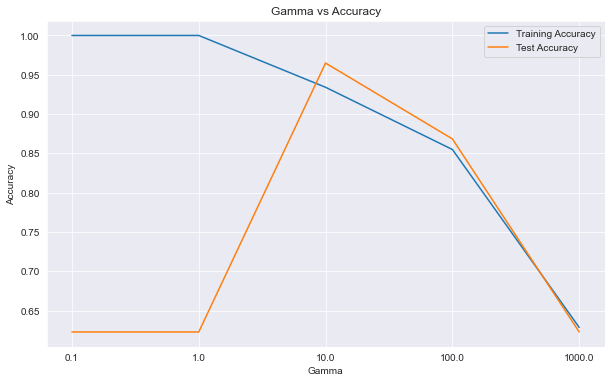

In [159]:
plt.figure(figsize=(10,6))
plt.plot(range(5),gamma_df['Training Accuracy'])
plt.plot(range(5),gamma_df['Test Accuracy'])

plt.xticks(range(5),gamma_df.index)
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("Gamma vs Accuracy")
plt.show()